# **Diabetes Prediction**


---
Name:\
Sejal Gawade(09)


# importing libraries




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Link to the dataset:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# Reading CSV File

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#basic Info about dataset


About Dataset


---


1.Gender : refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

2.Age : is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

3.Hypertension : is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0.

4.Heart disease: is another medical condition that is associated with an increased risk of developing diabetes.

5.Smoking history : is also considered a risk factor for diabetes and can exacerbate the complications associated.

6.BMI (Body Mass Index) : is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.

7.HbA1c (Hemoglobin A1c) level : is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels.

8.Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.

9.Diabetes : is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

In [4]:
#columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
#Size of the dataset
df.shape

(100000, 9)

In [6]:
#data type of columns
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# so There are total 9 columns in the dataset and 100000 rows
# In this dataset, target variable is diabetes and rest all are features
# In that, most of the columns are numeric but some columns are categorical.

In [9]:
# diabetes has 0 and 1 values 0 means not predict diabetes and 1 predict diabetes

# Checking for missing values

In [10]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [11]:
# If there are missing values in the dataset then , we can impute them using mean, median or mode
#1) If variable is numerical and has outliers then impute using median
#2) If variable is numerical and does not have outliers then impute using mean
#3) If variable is categorical then impute them Mode.

In [12]:
# there are no missing values

# Dropping duplicates

In [13]:
df[df.duplicated()].count()

,0
gender,3854
age,3854
hypertension,3854
heart_disease,3854
smoking_history,3854
bmi,3854
HbA1c_level,3854
blood_glucose_level,3854
diabetes,3854


In [14]:
# now there are 3854 duplicate values we need to drop all of this duplicate values
#Reasons we drop duplicate values
#1.Duplicates can introduce inconsistency in data and when we try to do summary statistics or fitting of any model this can skew our results
#2.In certain analyses, duplicate values can introduce bias.

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [17]:
df["gender"].value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [18]:
df[df['gender']== 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [19]:
# Remove Unnecessary value (Other).this value is not important and did not affect the data

In [20]:
# as there are 3 types of gender in which 'Other' has 18 values so we will not consider it

In [21]:
df1 =df[(df["gender"]=="Female") | (df["gender"]=="Male")]

In [22]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#Visualization of data

In [23]:
# Distribution of Gender

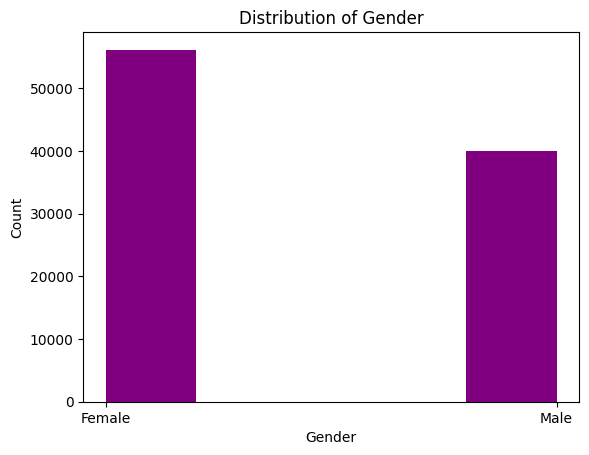

In [24]:
plt.hist(df1['gender'],color='purple',bins=5)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [25]:
# from this we can say that dataet has more female observation than men


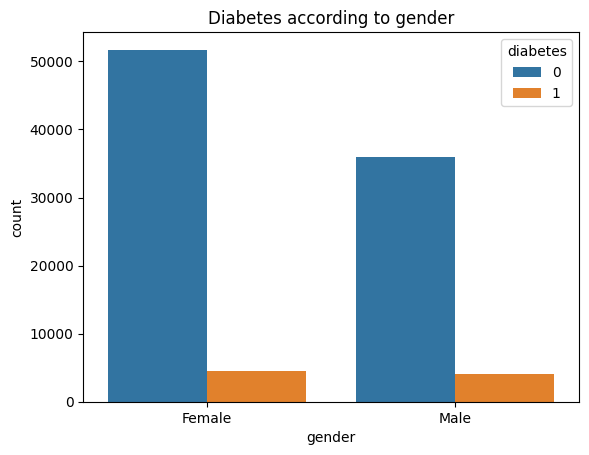

In [26]:
#visualizing gender vs diabetes
sns.countplot(x="gender",hue="diabetes",data=df1)
plt.title("Diabetes according to gender")
plt.show()

In [27]:
# from this we can interprete than this dataset has more number of ppl not having diabetes than having in both male and female categories
# In comparison ,female have people who do not have diabetes than male

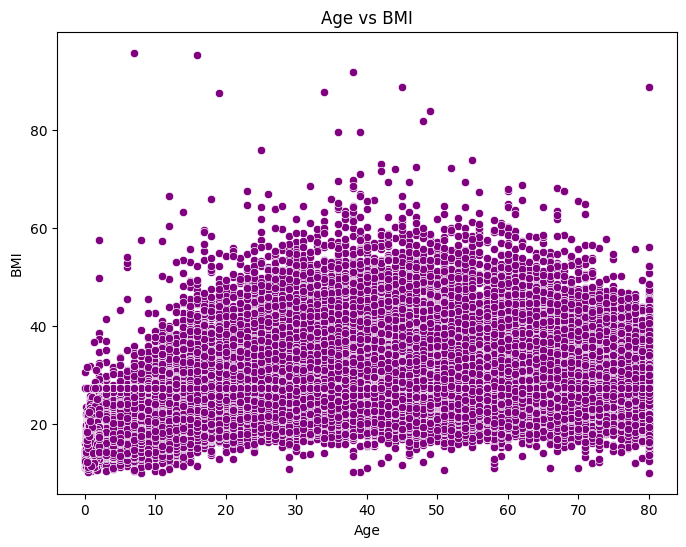

In [28]:

# Assuming df1 is your DataFrame containing the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi',color="purple", data=df1)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


In [29]:
# This scatter plot shows more spread of the data with people of age between 5 and 60.

Text(0.5, 1.0, 'Distribution of Smoking History')

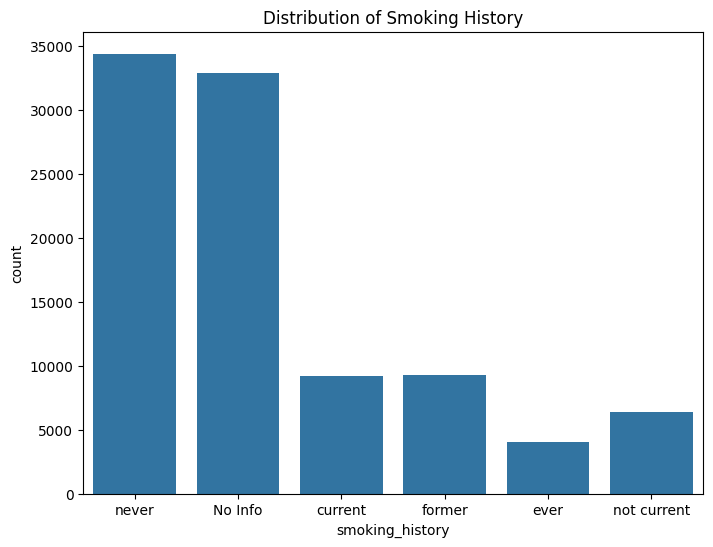

In [30]:
# Bar plot for 'smoking_history'
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', data=df1)
plt.title('Distribution of Smoking History')

In [31]:
# from this plot we can interprete that we have more information of people that do not smoke and have no information of smoking.

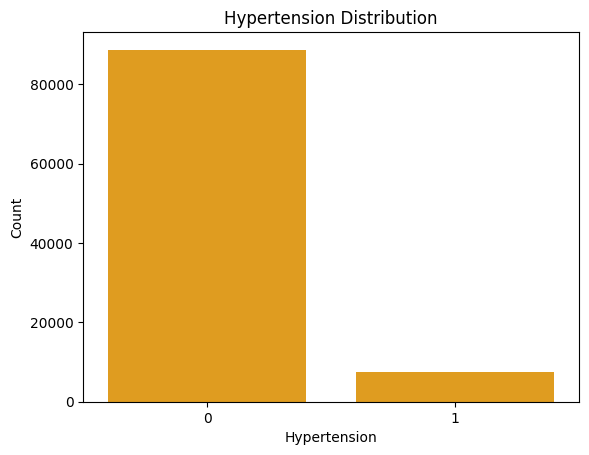

In [32]:
sns.countplot(x='hypertension',color ="orange" ,data=df1)
plt.title('Hypertension Distribution')
plt.ylabel('Count')
plt.xlabel('Hypertension')
plt.show()

In [33]:
# from this we can interpret that many poeple dont have hypertension

# summary statistics

In [34]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [35]:
# This is the summary statistics for all the variables

# Preprocessing

#Encoding of categorical columns

In [36]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [37]:
# here we have two categorical columns smoking_history and gender

In [38]:
df1["gender"].value_counts()

,count
gender,
Female,56161
Male,39967


In [39]:
# we perform binary encoding on gender because it has only 2 values male and female

In [40]:
df1["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
# encoding
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

/tmp/ipython-input-41-2968521244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)


In [42]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,No Info,24.60,4.8,145,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [43]:
# next column is smoking history

In [44]:
df1["smoking_history"].value_counts()

,count
smoking_history,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


In [45]:
# as there are many categories and none of them has any preference so one hot encoding is done
df1=pd.get_dummies(df1,prefix="smoking_history",dtype=int)

In [46]:
df1

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,0,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,0,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,24.60,4.8,145,0,1,0,0,0,0,0
99996,1,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0
99997,0,66.0,0,0,27.83,5.7,155,0,0,0,0,1,0,0
99998,1,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


* No Info: No information available about smoking history.
* Current: Individuals currently smoking.
* Ever: Individuals who have smoked at any point in their lives.
* Former: Individuals who used to smoke but have since quit.
* Never: Individuals who have never smoked.
* Not current: Individuals not currently smoking, which includes former
smokers and those who have never smoked.

# Normalization of columns

Why we do normalization:
*   Normalization ensures that all features contribute equally to the
analysis by bringing them to a common scale.
*  Normalization can make models more robust to outliers in the data.  the impact of outliers is reduced, leading to more stable and reliable model performance.
* Overall it improves the perfrormance of the model







(array([ 8748.,  6957.,  9242.,  9881., 10204., 11230., 11711., 10499.,
         7736.,  9920.]),
 array([ 0.08 ,  8.072, 16.064, 24.056, 32.048, 40.04 , 48.032, 56.024,
        64.016, 72.008, 80.   ]),
 <BarContainer object of 10 artists>)

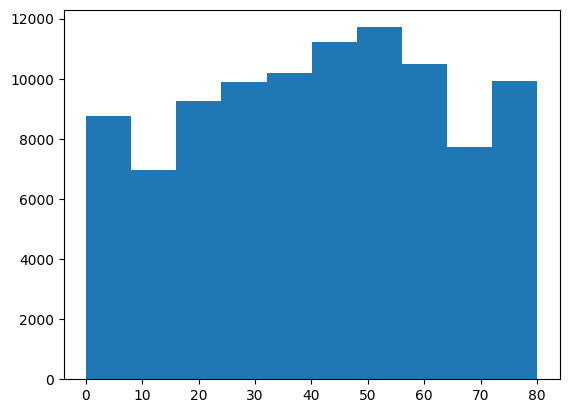

In [47]:
# numerical var
# age
plt.hist(df1["age"])

In [48]:
# As 'age' column is not follows ND so we try some transformation to make it ND

(array([3.6000e+01, 1.4600e+02, 3.3400e+02, 7.5100e+02, 1.9880e+03,
        2.8760e+03, 4.1910e+03, 9.8830e+03, 2.4827e+04, 5.1096e+04]),
 array([-2.52572864, -1.83495312, -1.14417759, -0.45340206,  0.23737347,
         0.928149  ,  1.61892452,  2.30970005,  3.00047558,  3.69125111,
         4.38202663]),
 <BarContainer object of 10 artists>)

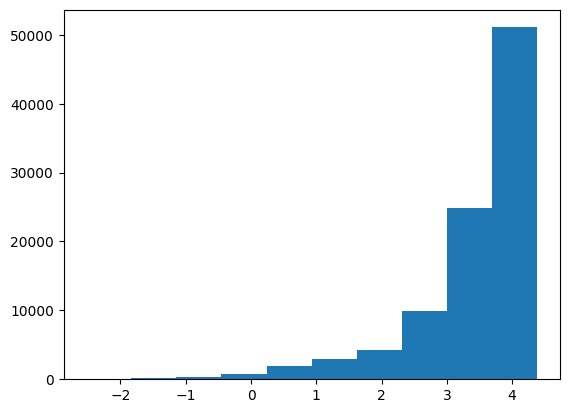

In [49]:
# log transformation
log_age= np.log(df1["age"])
plt.hist(log_age)

(array([ 1369.,  3804.,  3575.,  5029.,  7617., 11013., 12625., 17151.,
        17401., 16544.]),
 array([0.28284271, 1.14898563, 2.01512855, 2.88127147, 3.74741439,
        4.61355731, 5.47970023, 6.34584315, 7.21198607, 8.07812899,
        8.94427191]),
 <BarContainer object of 10 artists>)

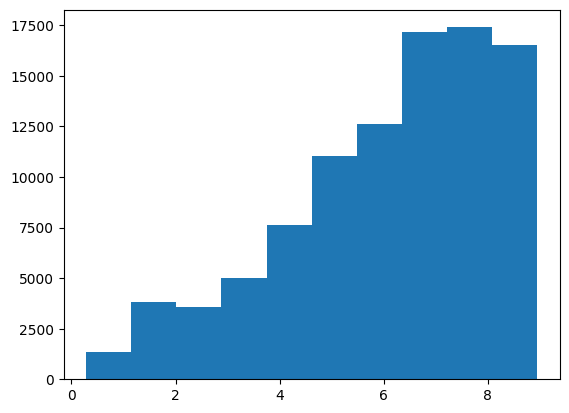

In [50]:
# sqrt
sqrt_a= np.sqrt(df1["age"])
plt.hist(sqrt_a)

(array([ 5173.,  5149.,  6362.,  9459.,  9882., 11583., 13100., 12815.,
        11048., 11557.]),
 array([-1.09014021,  2.97532019,  7.04078059, 11.10624099, 15.17170139,
        19.23716179, 23.30262219, 27.36808259, 31.43354299, 35.49900339,
        39.56446379]),
 <BarContainer object of 10 artists>)

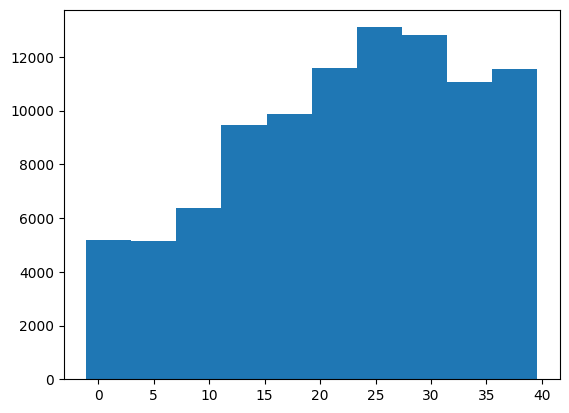

In [51]:
# boxcox
from scipy import stats
box_a , lam= stats.boxcox(df1["age"])
plt.hist(box_a)

(array([ 6131.,  4995.,  7899.,  8318.,  9893., 11779., 13168., 12705.,
         9683., 11557.]),
 array([ 0.07941912,  4.32596488,  8.57251063, 12.81905639, 17.06560214,
        21.3121479 , 25.55869365, 29.8052394 , 34.05178516, 38.29833091,
        42.54487667]),
 <BarContainer object of 10 artists>)

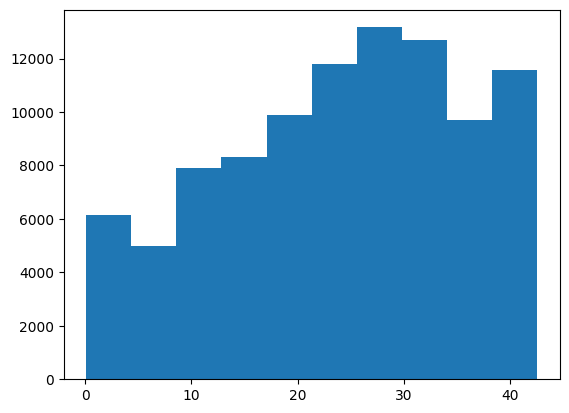

In [52]:
# johnson
from scipy import stats
yj_a , lam= stats.yeojohnson(df1["age"])
plt.hist(yj_a)

In [53]:
# here after trans also data not follow Normal Distribution so keep the same

(array([8.6520e+03, 3.1378e+04, 4.6526e+04, 7.3850e+03, 1.7160e+03,
        3.7900e+02, 7.3000e+01, 8.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([10.01 , 18.578, 27.146, 35.714, 44.282, 52.85 , 61.418, 69.986,
        78.554, 87.122, 95.69 ]),
 <BarContainer object of 10 artists>)

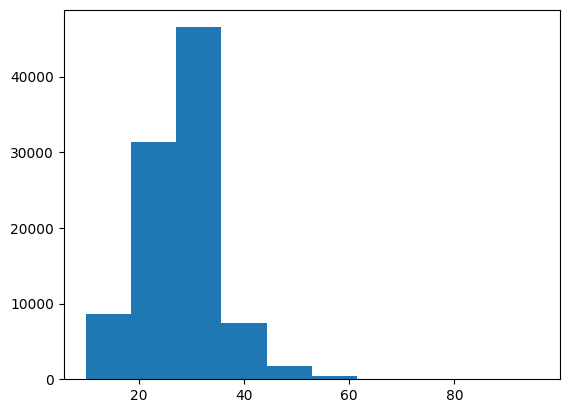

In [54]:
# next column : bmi
plt.hist(df1["bmi"])

(array([1.3300e+02, 2.5870e+03, 8.5980e+03, 1.8159e+04, 4.6285e+04,
        1.4691e+04, 4.6500e+03, 9.2700e+02, 8.7000e+01, 1.1000e+01]),
 array([2.30358459, 2.52933751, 2.75509043, 2.98084336, 3.20659628,
        3.4323492 , 3.65810212, 3.88385504, 4.10960796, 4.33536088,
        4.5611138 ]),
 <BarContainer object of 10 artists>)

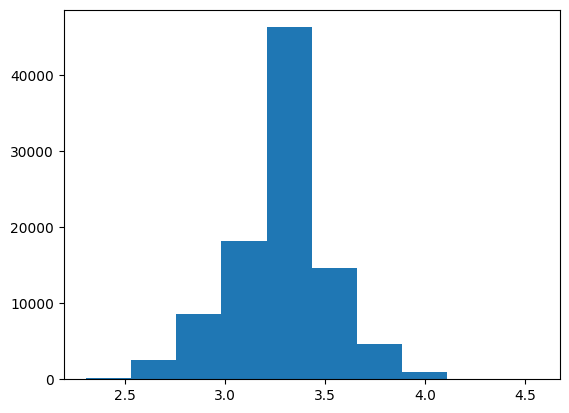

In [55]:
# log trans
log_b= np.log(df1["bmi"])
plt.hist(log_b)

In [56]:
# After log transformation it look like ND so we've change original bmi column with log_b

In [57]:
df1["bmi"]= log_b

In [58]:
df1

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,80.0,0,1,3.226447,6.6,140,0,0,0,0,0,1,0
1,1,54.0,0,0,3.307619,6.6,80,0,1,0,0,0,0,0
2,0,28.0,0,0,3.307619,5.7,158,0,0,0,0,0,1,0
3,1,36.0,0,0,3.154870,5.0,155,0,0,1,0,0,0,0
4,0,76.0,1,1,3.002708,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,3.202746,4.8,145,0,1,0,0,0,0,0
99996,1,2.0,0,0,2.854745,6.5,100,0,1,0,0,0,0,0
99997,0,66.0,0,0,3.326115,5.7,155,0,0,0,0,1,0,0
99998,1,24.0,0,0,3.567277,4.0,100,0,0,0,0,0,1,0


(array([14520.,  7289., 14449.,     0., 39770., 16854.,   633.,   642.,
          659.,  1312.]),
 array([3.5 , 4.05, 4.6 , 5.15, 5.7 , 6.25, 6.8 , 7.35, 7.9 , 8.45, 9.  ]),
 <BarContainer object of 10 artists>)

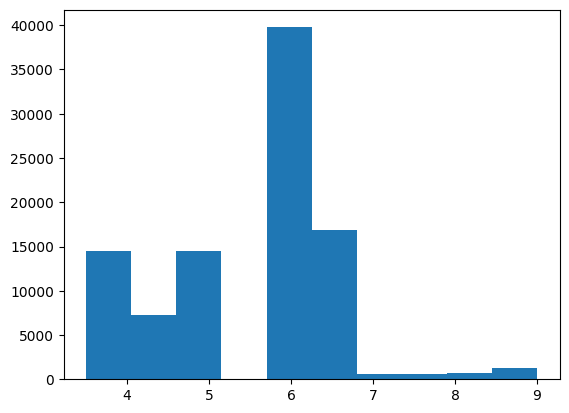

In [59]:
# HbA1c_level
plt.hist(df1["HbA1c_level"])

(array([ 7316.,  7204.,  7289., 14449.,     0., 31814., 24168.,  1275.,
          642.,  1971.]),
 array([1.25276297, 1.34720913, 1.44165529, 1.53610145, 1.63054761,
        1.72499377, 1.81943993, 1.91388609, 2.00833226, 2.10277842,
        2.19722458]),
 <BarContainer object of 10 artists>)

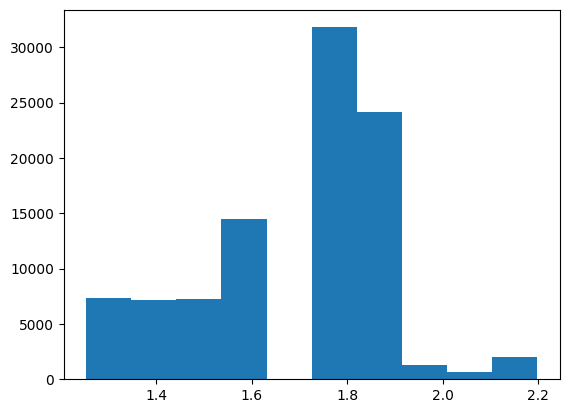

In [60]:
# log trans
log_h = np.log(df1["HbA1c_level"])
plt.hist(log_h)

In [61]:
# sqrt trans
sqrt_h= np.sqrt(df1["HbA1c_level"])

(array([ 7316.,  7204., 14585.,  7153., 16115., 23655., 17487.,   642.,
          659.,  1312.]),
 array([1.87082869, 1.98374582, 2.09666295, 2.20958009, 2.32249722,
        2.43541435, 2.54833148, 2.66124861, 2.77416574, 2.88708287,
        3.        ]),
 <BarContainer object of 10 artists>)

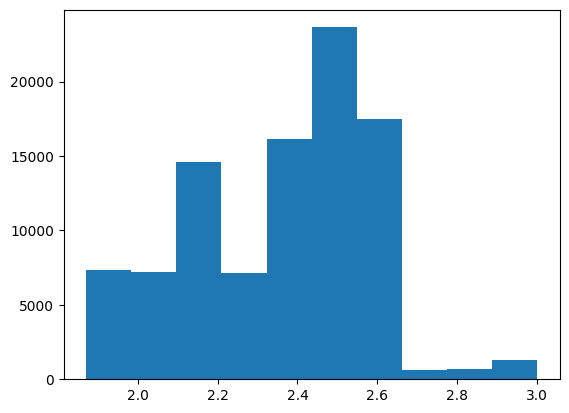

In [62]:
plt.hist(sqrt_h)

In [63]:
#  boxcox transf
from scipy import stats
box_h , lam = stats.boxcox(df1["HbA1c_level"])

(array([14520.,  7289., 14449.,  8123., 31647., 16854.,   633.,   642.,
          659.,  1312.]),
 array([2.66632335, 3.30716234, 3.94800132, 4.5888403 , 5.22967928,
        5.87051827, 6.51135725, 7.15219623, 7.79303521, 8.4338742 ,
        9.07471318]),
 <BarContainer object of 10 artists>)

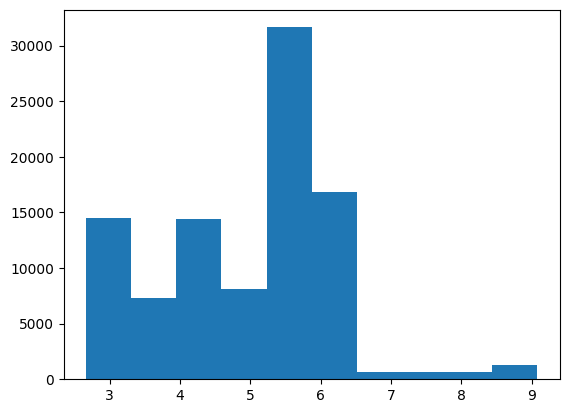

In [64]:
plt.hist(box_h)

In [65]:
# after all trasformation data is not following ND
# so we will keep as it is

(array([27010.,     0., 29675., 28890.,     0.,  7289.,   600.,   633.,
          634.,  1397.]),
 array([ 80., 102., 124., 146., 168., 190., 212., 234., 256., 278., 300.]),
 <BarContainer object of 10 artists>)

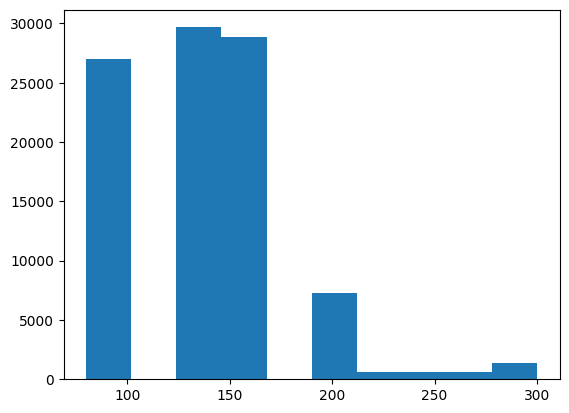

In [66]:
# blood glucose
plt.hist(df1["blood_glucose_level"])

(array([20236.,  6774.,     0., 14890., 14785., 28890.,  7289.,   600.,
         1267.,  1397.]),
 array([4.38202663, 4.51420222, 4.6463778 , 4.77855339, 4.91072897,
        5.04290455, 5.17508014, 5.30725572, 5.43943131, 5.57160689,
        5.70378247]),
 <BarContainer object of 10 artists>)

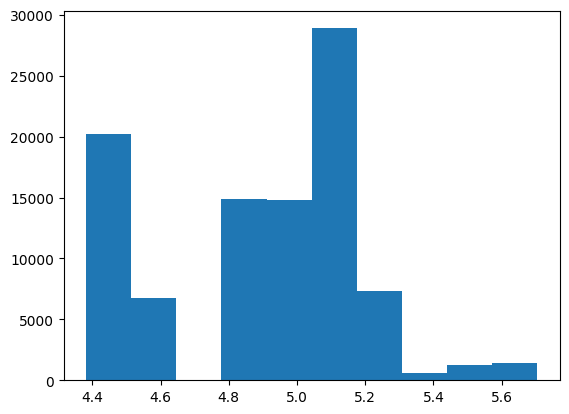

In [67]:
# log trans
log_b = np.log(df1["blood_glucose_level"])
plt.hist(log_b)

(array([20236.,  6774.,     0., 14890., 14785., 28890.,  7289.,   600.,
         1267.,  1397.]),
 array([4.38202663, 4.51420222, 4.6463778 , 4.77855339, 4.91072897,
        5.04290455, 5.17508014, 5.30725572, 5.43943131, 5.57160689,
        5.70378247]),
 <BarContainer object of 10 artists>)

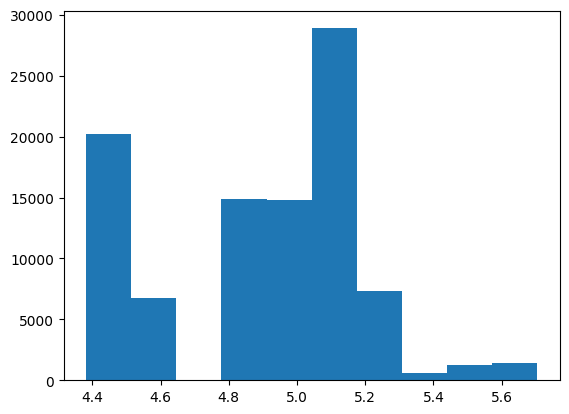

In [68]:
# sqrt trans
sqrt_b = np.log(df1["blood_glucose_level"])
plt.hist(sqrt_b)

In [69]:
# We have normalized one column i.e Bmi

#Outlier Management

In [70]:
# for this, Outlier management we will go column wise , we remove this outliers using Interquartile range (IQR)

In [71]:
#age column

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0b18252d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0b182515d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ad047c250>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0b18281910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0b18251a10>],
 'means': []}

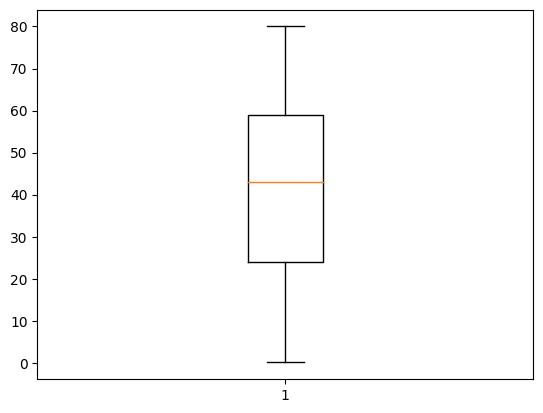

In [72]:
plt.boxplot(df1['age'])

In [73]:
# in age column there are no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0ad2ba0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0ad2b41a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ad2b5a7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0ad2b43e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0ad01dbe10>],
 'means': []}

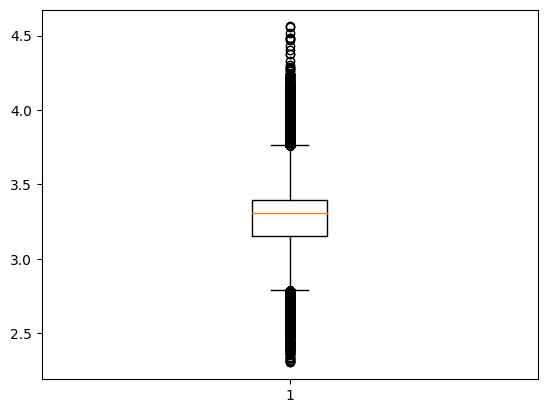

In [74]:
#bmi
plt.boxplot(df1['bmi'])

In [75]:
# For BMI column, we treated outliers using three ways
#1) leaving them as it is
#2) Removing them in one iteration
#3) Imputing them with median
# But accuracy differs little bit so we stick with 2nd way removing them in one iteration

In [76]:
q1=df1['bmi'].quantile(0.25)
q3=df1['bmi'].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df1['bmi']>=max1
lower=df1['bmi']<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [77]:
for i in upper_in:
    df1.drop(i,inplace=True)
for i in lower_in:
    df1.drop(i,inplace=True)

In [78]:
# next column "HbA1c_level"

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0ad0169a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0ad016b050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ad0168e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0ad016c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0ad016cd10>],
 'means': []}

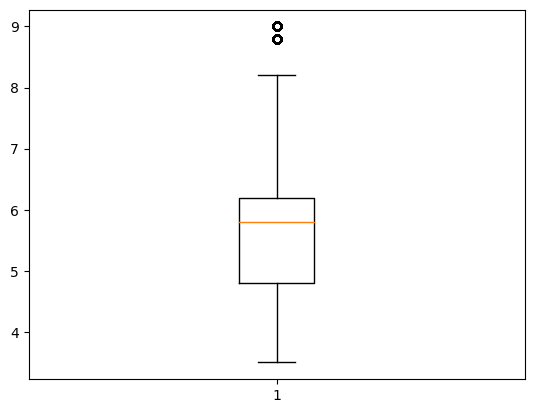

In [79]:
plt.boxplot(df1["HbA1c_level"])

In [80]:
q1=df1['HbA1c_level'].quantile(0.25)
q3=df1['HbA1c_level'].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df1['HbA1c_level']>=max1
lower=df1['HbA1c_level']<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [81]:
for i in upper_in:
    df1.drop(i,inplace=True)
for i in lower_in:
    df1.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0ac7708ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0ac7709e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ad018bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0ac770af90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0ad01caf10>],
 'means': []}

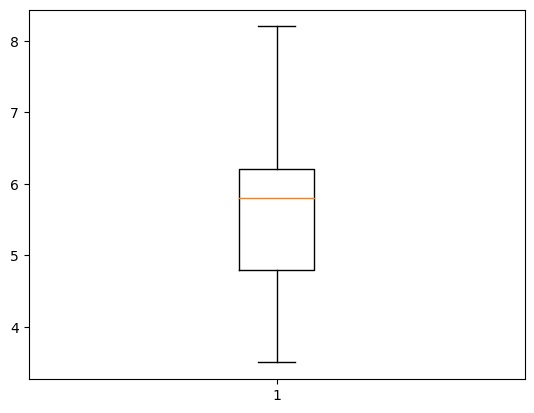

In [82]:
plt.boxplot(df1["HbA1c_level"])

In [83]:
# Now , there are no outliers in the HbA1c_level column

In [84]:
# next column "blood_glucose_level"

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0ac7761f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0ac7763510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ac7758f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0ac7770b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0ac7738a90>],
 'means': []}

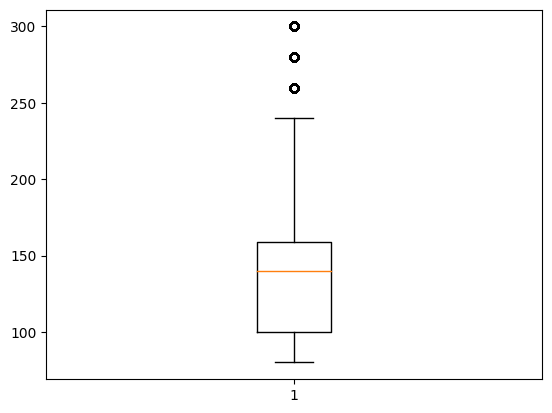

In [85]:
plt.boxplot(df1["blood_glucose_level"])

In [86]:
q1=df1['blood_glucose_level'].quantile(0.25)
q3=df1['blood_glucose_level'].quantile(0.75)
IQR=q3-q1
max1=q3+1.5*IQR
min1=q1-1.5*IQR
upper=df1['blood_glucose_level']>=max1
lower=df1['blood_glucose_level']<=min1
upper_in=[]
lower_in=[]
for i in upper.index:
    if upper[i]==True:
        upper_in.append(i)
for i in lower.index:
    if lower[i]==True:
        lower_in.append(i)

In [87]:
for i in upper_in:
    df1.drop(i,inplace=True)
for i in lower_in:
    df1.drop(i,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0ac77c7050>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0ac77d4890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0ac77c6490>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0ac77d5e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0ac77b7690>],
 'means': []}

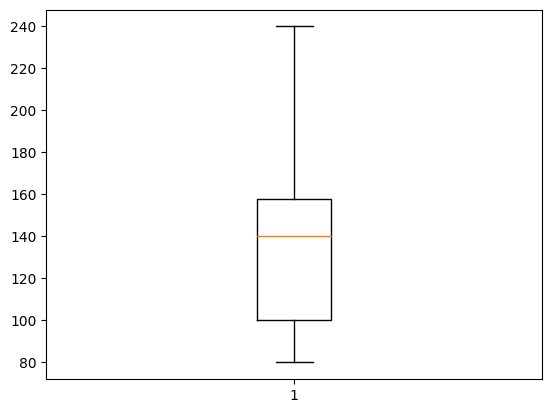

In [88]:
plt.boxplot(df1["blood_glucose_level"])

In [89]:
# Now, There are no outliers in 'blood_glucose_level' column

# standard Scaling




* Scaling: Scaling is very important, It helps to ML models perform in a better way.
* We only do scaling of numerical independent variables
* For scaling we are using StandardScaler, beacuse it uses standard normal distribution logic for scaling





In [90]:
# As we seen earlier some columns are not following ND so to work with that columns we use this and to make it in one scale
# standard Scaling when dealing with features that have different scales or distributions.

In [91]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [92]:
num_var= ["age",'bmi', 'HbA1c_level','blood_glucose_level']

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[num_var])
df1[num_var]=scaler.transform(df1[num_var])

In [94]:
df1

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,1.722097,0,1,-0.273811,1.139565,0.147260,0,0,0,0,0,1,0
1,1,0.528100,0,0,0.141415,1.139565,-1.550429,0,1,0,0,0,0,0
2,0,-0.665897,0,0,0.141415,0.236448,0.656567,0,0,0,0,0,1,0
3,1,-0.298513,0,0,-0.639953,-0.465977,0.571682,0,0,1,0,0,0,0
4,0,1.538406,1,1,-1.418325,-0.666670,0.571682,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,-0.298513,0,0,-0.395049,-0.666670,0.288734,0,1,0,0,0,0,0
99996,1,-1.859894,0,0,-2.175216,1.039219,-0.984533,0,1,0,0,0,0,0
99997,0,1.079176,0,0,0.236027,0.236448,0.571682,0,0,0,0,1,0,0
99998,1,-0.849589,0,0,1.469666,-1.469442,-0.984533,0,0,0,0,0,1,0


In [95]:
# Scaling is done
# Now we will check , Data is imbalanced or not

In [96]:
df1["diabetes"].value_counts()

,count
diabetes,
0,81941
1,4932


In [97]:
# # As you can see count of 1 is very less in the dataset which leads to imbalanced data,

* There are two ways to balance the data:
*1) Undersampling
*2) Oversampling
* We have done oversampling here because after doing undersampling the instance of 0's 5000 and 1's 4932 so this shows loss of the data which is not a good practice.
* In oversampling there are two ways:
*1) SMOTE (Synthetic Minority Oversampling Technique)
*2) ROSE (Random oversampling)
* we have done SMOTE over ROSE because in ROSE data is generated repeatedly from existing classes but it creates duplicate values which we remove earlier which will leads to overfitting in model but in SMOTE new data is generated using existing minority sample classes.

# oversampling

In [98]:
y= df1["diabetes"]

In [99]:
del df1["diabetes"]

In [100]:
x=df1

Why we did smoth oversampling so there are two ways for oversampling
randomoversampler and SMOTE
* What Random oversampler do is  it randomly duplicates instances from the minority class until the class distribution is balanced.
* May lead to overfitting, as it duplicates existing instances rather than generating new ones.
* Could potentially increase the risk of model bias if the minority class is already overrepresented.

2.   SMOTE:
creating synthetic samples for the minority class. It generates synthetic examples by interpolating between existing minority class instances.





In [101]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.6) # here we are keeping ratio of 60:40
x_resampled, y_resampled = oversample.fit_resample(x, y)


In [102]:
x_resampled

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,1.722097,0,1,-0.273811,1.139565,0.147260,0,0,0,0,1,0
1,1,0.528100,0,0,0.141415,1.139565,-1.550429,1,0,0,0,0,0
2,0,-0.665897,0,0,0.141415,0.236448,0.656567,0,0,0,0,1,0
3,1,-0.298513,0,0,-0.639953,-0.465977,0.571682,0,1,0,0,0,0
4,0,1.538406,1,1,-1.418325,-0.666670,0.571682,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131100,1,-1.377786,0,0,-1.224660,1.039219,0.642674,1,0,0,0,0,0
131101,0,1.030340,0,0,0.908497,0.537487,0.684862,0,0,0,0,1,0
131102,0,1.645930,0,0,0.598191,1.240398,0.572368,0,0,0,0,1,0
131103,0,1.282361,0,0,0.105235,0.236448,2.976742,0,1,0,0,0,0


In [103]:
y_resampled.value_counts()

,count
diabetes,
0,81941
1,49164


# Feature Selection

The goal of feature selection is to improve model performance, reduce overfitting, and enhance interpretability by focusing on the most informative and discriminative features

In [104]:
from sklearn.feature_selection import SelectKBest

In [105]:
best_features= SelectKBest()
best_features

SelectKBest()

In [106]:
fit = best_features.fit(x_resampled ,y_resampled)
fit.scores_

array([1.02631479e+03, 3.51847631e+04, 7.54299959e+03, 4.41504202e+03,
       1.41884691e+04, 5.40277294e+04, 3.00033224e+04, 4.52288238e+03,
       2.41387709e+01, 1.39909213e+02, 2.76918263e+03, 1.30492400e+02,
       7.01125618e+01])

In [107]:
dfscores =pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_resampled.columns)

In [108]:
featureScores = pd.concat([dfcolumns, dfscores], axis= 1)

In [109]:
featureScores.columns = ['Features', 'Scores']
featureScores

,Features,Scores
0,gender,1026.314786
1,age,35184.763064
2,hypertension,7542.999592
3,heart_disease,4415.042023
4,bmi,14188.469146
5,HbA1c_level,54027.729362
6,blood_glucose_level,30003.322429
7,smoking_history_No Info,4522.882383
8,smoking_history_current,24.138771
9,smoking_history_ever,139.909213


In [110]:
featureScores.sort_values(by= "Scores", ascending= False)

,Features,Scores
5,HbA1c_level,54027.729362
1,age,35184.763064
6,blood_glucose_level,30003.322429
4,bmi,14188.469146
2,hypertension,7542.999592
7,smoking_history_No Info,4522.882383
3,heart_disease,4415.042023
10,smoking_history_former,2769.182631
0,gender,1026.314786
9,smoking_history_ever,139.909213


 As you can see feature scores are high for every feature, none of the feature has less feature score, it indicates that each variable contributes significantly to the predictive power of the model. Every feature is important and relevant for this dataset.

# model building

* TP: The model correctly predicts diabetes when it is present.
* TN: The model correctly predicts the absence of diabetes when it is indeed absent.
* FP: The model incorrectly predicts diabetes when it is not present.
* FN: The model incorrectly predicts the absence of diabetes when it is actually present.


Accuracy:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

--


Precision:

Precision = TP / (TP + FP)

---


Recall (Sensitivity):

Recall = TP / (TP + FN)

---
F1 Score:

F1 score= 2 * precision * recall / (precision*recall)

---

Specificity:

Specificity = TN / (TN + FP)


# AUC ROC Curve :
* It indicates how well the probabilities from positive classes are separated from negative classes.
* It is graph showing the performance of a classification model at classification thresholds.
*

In [111]:
# Now we will start creating models, We have got final dataset that can be used to create models

#KNN

* When making predictions for a new, unseen data point, the KNN algorithm calculates the distance between the new point and all points in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, or cosine similarity.
* The algorithm then identifies the k nearest neighbors of the new data point based on the calculated distances. "k" is a hyperparameter specified by the user.
* For classification tasks, KNN assigns the class label most frequently occurring among the k nearest neighbors to the new data point. This is known as majority voting.


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_test_pred=knn_model.predict(x_test)
print("confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy")
print(accuracy_score(y_test,y_test_pred))
print("precision:")
print(precision_score(y_test,y_test_pred))
print("recall")
print(recall_score(y_test,y_test_pred))
print("classification report")
print(classification_report(y_test,y_test_pred))
print("f1_score")
print(f1_score(y_test,y_test_pred))

confusion matrix
[[22667  1884]
 [  450 14331]]
accuracy
0.9406590053900132
precision:
0.8838112858464385
recall
0.9695555104526081
classification report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     24551
           1       0.88      0.97      0.92     14781

    accuracy                           0.94     39332
   macro avg       0.93      0.95      0.94     39332
weighted avg       0.94      0.94      0.94     39332

f1_score
0.9246999612853272


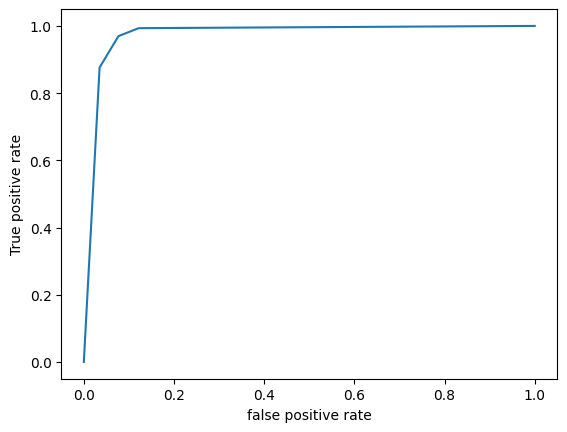

In [113]:
from sklearn.metrics import roc_auc_score,roc_curve
y_test_pred_prob=knn_model.predict_proba(x_test)
fpr,trp,thresh=roc_curve(y_test,y_test_pred_prob[:,1],pos_label=1)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,trp)


# Decision Tree

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score



x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(x_train, y_train)


y_test_pred = dt_model.predict(x_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_test_pred))

print("\nPrecision:")
print(precision_score(y_test, y_test_pred))

print("\nRecall:")
print(recall_score(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nF1 Score:")
print(f1_score(y_test, y_test_pred))


Confusion Matrix:
[[23651   900]
 [  828 13953]]

Accuracy:
0.9560663073324519

Precision:
0.9394061805695819

Recall:
0.9439821392327988

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     24551
           1       0.94      0.94      0.94     14781

    accuracy                           0.96     39332
   macro avg       0.95      0.95      0.95     39332
weighted avg       0.96      0.96      0.96     39332


F1 Score:
0.9416886009313626


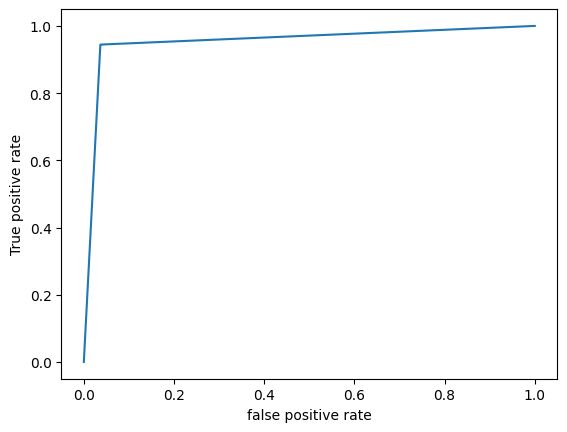

In [115]:
from sklearn.metrics import roc_auc_score,roc_curve
y_test_pred_prob=dt_model.predict_proba(x_test)
fpr,trp,thresh=roc_curve(y_test,y_test_pred_prob[:,1],pos_label=1)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,trp)

# Logistic Regression

* As the target variable is of binary type in our dataset hence we use logistic regression.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_test_pred=logistic_model.predict(x_test)
print("confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy")
print(accuracy_score(y_test,y_test_pred))
print("precision:")
print(precision_score(y_test,y_test_pred))
print("recall")
print(recall_score(y_test,y_test_pred))
print("classification report")
print(classification_report(y_test,y_test_pred))
print("f1_score")
print(f1_score(y_test,y_test_pred))

confusion matrix
[[21998  2553]
 [ 2912 11869]]
accuracy
0.8610546120207465
precision:
0.8229787824157537
recall
0.802990325417766
classification report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     24551
           1       0.82      0.80      0.81     14781

    accuracy                           0.86     39332
   macro avg       0.85      0.85      0.85     39332
weighted avg       0.86      0.86      0.86     39332

f1_score
0.8128616922918879


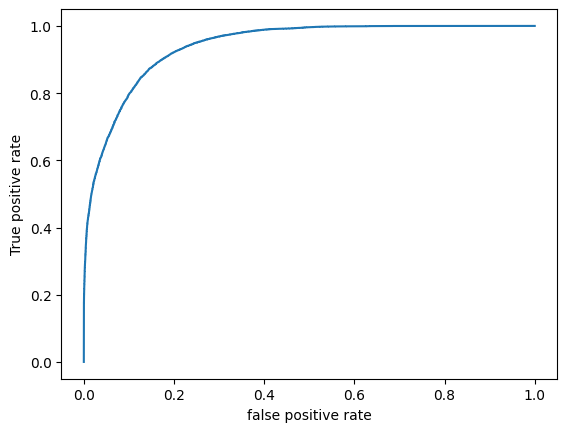

In [117]:
from sklearn.metrics import roc_auc_score,roc_curve
y_test_pred_prob=logistic_model.predict_proba(x_test)
fpr,trp,thresh=roc_curve(y_test,y_test_pred_prob[:,1],pos_label=1)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,trp)

# Random Forest

In [118]:
# random forest consists many dts
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)
random_forest_model=RandomForestClassifier(n_estimators=10)
random_forest_model.fit(x_train,y_train)
y_test_pred=random_forest_model.predict(x_test)
print("confusion matrix:")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy:")
print(accuracy_score(y_test,y_test_pred))
print("precision:")
print(precision_score(y_test,y_test_pred))
print("recall:")
print(recall_score(y_test,y_test_pred))
print("classification report")
print(classification_report(y_test,y_test_pred))
print("f1_score:")


confusion matrix:
[[16027   381]
 [  573  9240]]
accuracy:
0.9636169482475878
precision:
0.9603991269098846
recall:
0.9416080709263223
classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16408
           1       0.96      0.94      0.95      9813

    accuracy                           0.96     26221
   macro avg       0.96      0.96      0.96     26221
weighted avg       0.96      0.96      0.96     26221

f1_score:


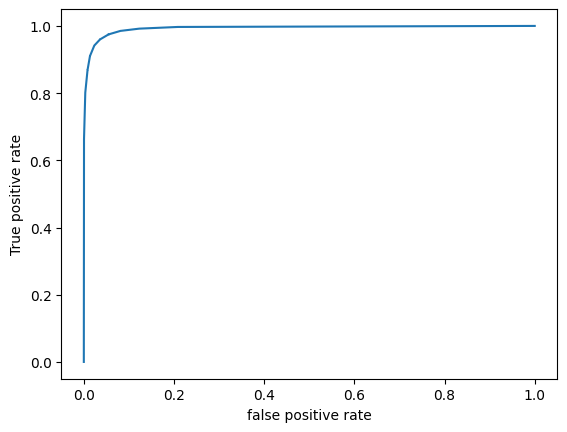

In [119]:
from sklearn.metrics import roc_auc_score,roc_curve
y_test_pred_prob=random_forest_model.predict_proba(x_test)
fpr,trp,thresh=roc_curve(y_test,y_test_pred_prob[:,1],pos_label=1)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,trp)

# PyCaret

we cannot say by doing this 5 models which one is best for our dataset so what we do is we use pycaret model.This compares all the classification models for your data and gives you its accuracy, precision , recall and tells you that which model is going to work best for your data.

In [120]:
pip install pycaret

In [121]:
from pycaret.classification import *

In [122]:
df2= pd.concat([x_resampled, y_resampled],axis=1) # we merge resampled x and y values into a new dataframe named df2

In [123]:
s=setup(data=df2,target="diabetes",session_id=123)
 # providing the cleaned data, because pycaret algorithm that does everything by itself

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(131105, 14)"
4,Transformed data shape,"(131105, 14)"
5,Transformed train set shape,"(91773, 14)"
6,Transformed test set shape,"(39332, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [124]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9729,0.9959,0.9348,0.9926,0.9628,0.9415,0.9426,3.8200
xgboost,Extreme Gradient Boosting,0.9713,0.9953,0.9350,0.9878,0.9607,0.9382,0.9390,0.4980
rf,Random Forest Classifier,0.9667,0.9954,0.9562,0.9551,0.9556,0.9290,0.9290,5.8860
et,Extra Trees Classifier,0.9664,0.9941,0.9650,0.9464,0.9556,0.9286,0.9287,4.8680
dt,Decision Tree Classifier,0.9543,0.9522,0.9432,0.9356,0.9394,0.9028,0.9028,0.2170
gbc,Gradient Boosting Classifier,0.9513,0.9913,0.9099,0.9581,0.9334,0.8950,0.8958,6.6360
knn,K Neighbors Classifier,0.9300,0.9757,0.9663,0.8634,0.9120,0.8542,0.8579,1.9620
ada,Ada Boost Classifier,0.9293,0.9842,0.9022,0.9086,0.9053,0.8489,0.8489,1.7060
lda,Linear Discriminant Analysis,0.8593,0.9383,0.8193,0.8082,0.8136,0.7006,0.7007,0.1100
ridge,Ridge Classifier,0.8587,0.9383,0.8148,0.8097,0.8122,0.6989,0.6989,0.0600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]


* Light Gradient Boosting Machine is performing the best among all hence we use and create a model
* In medical domain , Recall is important so if we want to go for recall then use KNN model as it has high recall than rest of the model.

# Light Gradient Boosting Machine Model

* LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that uses decision trees to create strong predictive models. It builds trees sequentially to correct errors and uses a leaf-wise growth strategy for faster training. LightGBM optimizes tree structures using gradients and offers regularization options. It supports parallel/distributed training, making it efficient for large datasets. Overall, LightGBM is powerful for tasks like classification, regression, and ranking due to its efficient algorithms and optimization techniques.
* It is use for large scale datasets.

In [125]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

# LightGBM Classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

y_test_pred = lgb_model.predict(x_test)

# Evaluation metrics
print("confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("accuracy:")
print(accuracy_score(y_test, y_test_pred))

print("precision:")
print(precision_score(y_test, y_test_pred))

print("recall:")
print(recall_score(y_test, y_test_pred))

print("classification report:")
print(classification_report(y_test, y_test_pred))

print("f1_score:")
print(f1_score(y_test, y_test_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34383, number of negative: 57390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 91773, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374653 -> initscore=-0.512308
[LightGBM] [Info] Start training from score -0.512308
confusion matrix:
[[24474    77]
 [  981 13800]]
accuracy:
0.9731007830773925
precision:
0.9944512502702313
recall:
0.9336310127866856
classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24551
           1       0.99      0.93      0.96     14781

    accuracy                           0.97     39332
   macro avg       0.98      0.97      0.97     39

* The accuracy of the model is 97.24%, which indicates that it correctly predicts the absence or presence of diabetes in 97.24% of cases.
* The precision for class 1 (presence of diabetes) is 99.47%. This means that when the model predicts a positive result (presence of diabetes), it is correct 99.47% of the time.
* The recall value of 1.00 for class 0 (absence of diabetes) means that the model correctly identifies all instances where diabetes is absent. For class 1 (presence of diabetes), the recall of 0.93 indicates that the model captures 93% of the actual positive cases.

In [126]:
# To check for overfitting

In [127]:
# we compare training and testing accuracy
print("training accuracy :",lgb_model.score(x_train,y_train))
print("testing accuracy :",lgb_model.score(x_test,y_test))

training accuracy : 0.9758861538796814
testing accuracy : 0.9731007830773925


In [128]:
# as you can see there is no huge difference in training and testing accuracy

In [129]:
# Second Overfitting check using cross validation

# Cross validation technique to determine overfitting

In [130]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgb_model, x ,y , cv=kf, scoring='accuracy')
print("cross validation scores:",cv_scores)
print("average accuracy:",cv_scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3952, number of negative: 65546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 69498, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.056865 -> initscore=-2.808530
[LightGBM] [Info] Start training from score -2.808530
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3935, number of negative: 65563
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 69498, number of used fea

As you can see there is not a huge difference between model's accuracy and cross validation mean accuracy hence we use this as a final model and find probabilites

#Fine Tuning

Why Fine tuning is done ?
* Fine-tuning is done in machine learning and deep learning to optimize model performance, improve generalization, prevent overfitting, adapt to specific tasks or domains, and enhance training efficiency.

In [131]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40],
    'max_depth': [5,10,15]
}

In [132]:
from sklearn.model_selection import RandomizedSearchCV
research_rf= RandomizedSearchCV(lgb_model, param_distributions = param_grid, n_iter = 10, n_jobs = 1, scoring = 'accuracy', cv = kf, verbose = 5)

In [133]:
research_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27539, number of negative: 45879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 73418, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375099 -> initscore=-0.510404
[LightGBM] [Info] Start training from score -0.510404
[CV 1/5] END learning_rate=0.1, max_depth=10, num_leaves=40;, score=0.970 total time=   0.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27434, number of negative: 45984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `forc

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=None,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, subsample=1.0,
                                            subsample_for_bin=200000,
                                            subsample_freq=0),
                   n_iter=10, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 10, 15],
                                        'num_leaves': [20, 30, 40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=5)

In [134]:
research_rf.best_params_

{'num_leaves': 40, 'max_depth': 15, 'learning_rate': 0.1}

In [135]:
lgb_model = lgb.LGBMClassifier(num_leaves=40, max_depth = 15,learning_rate=0.1)
lgb_model.fit(x_train, y_train)

y_test_pred = lgb_model.predict(x_test)

# Evaluation metrics
print("confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("accuracy:")
print(accuracy_score(y_test, y_test_pred))

print("precision:")
print(precision_score(y_test, y_test_pred))

print("recall:")
print(recall_score(y_test, y_test_pred))

print("classification report:")
print(classification_report(y_test, y_test_pred))

print("f1_score:")
print(f1_score(y_test, y_test_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34383, number of negative: 57390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 91773, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374653 -> initscore=-0.512308
[LightGBM] [Info] Start training from score -0.512308
confusion matrix:
[[24443   108]
 [  977 13804]]
accuracy:
0.972414319129462
precision:
0.9922369177688327
recall:
0.9339016304715513
classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24551
           1       0.99      0.93      0.96     14781

    accuracy                           0.97     39332
   macro avg       0.98      0.96      0.97     393

AUC-ROC Score: 0.9959888969259802


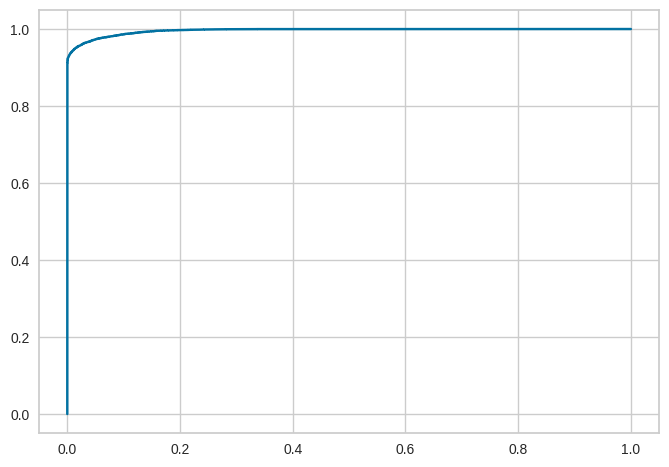

In [136]:
from sklearn.metrics import roc_auc_score,roc_curve
y_test_pred_prob=lgb_model.predict_proba(x_test)
fpr,trp,thresh=roc_curve(y_test,y_test_pred_prob[:,1],pos_label=1)
auc_roc_score = roc_auc_score(y_test, y_test_pred_prob[:, 1])
plt.plot(fpr,trp)
print('AUC-ROC Score:', auc_roc_score)

#Conclusion:
* In this project, we developed a LightGBM model for diabetes prediction and achieved an impressive accuracy score of 0.97. This high
accuracy demonstrates the effectiveness of the model in accurately classifying individuals with and without diabetes based on their health data.
*The LightGBM model outperformed other models in terms of accuracy and efficiency, making it a promising tool for diabetes prediction. Its ability to handle large datasets and capture complex relationships between features contributed to its superior performance.
*In medical domain recall is important so if someone wants both recall and accuracy they can use Lightgbm but if someone wants high recalll then KNN model is best for that.
*Looking ahead, future research could focus on incorporating additional features, such as genetic data or lifestyle factors, to improve the accuracy and robustness of diabetes prediction models.
*In conclusion, our machine learning project highlights the importance of accurate diabetes prediction in advancing personalized healthcare and improving patient outcomes. The success of the LightGBM model underscores its potential as a valuable tool for early detection and management of diabetes, ultimately contributing to better healthcare delivery and patient well-being.

